# Ejemplo de EDA: Análisis Exploratorio de Datos

EDA es la sigla en inglés para Exploratory Data Analysis y consiste en una de las primeras tareas que
tiene que desempeñar el Científico de Datos. Es cuando revisamos por primera vez los datos que nos
llegan, por ejemplo un archivo CSV y deberemos intentar comprender “¿de qué se trata?”, vislumbrar
posibles patrones y reconocer distribuciones estadísticas que puedan ser útiles en el futuro.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  #!pip install statsmodels

## Carga de archivo csv desde una URL

In [4]:
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df  = pd.read_csv(url, sep=";") #index_col=0
display(df.head(5))
print(df.head(5))

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

In [5]:
# ver las primeras filas 
df.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [6]:
# ver las ultimas  filas 
df.tail()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,NaN,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,NaN,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,NaN,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,NaN,NaN,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,NaN,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs
251,AN,ANT,960.0,Willemstad,NaN,ANG,Guilder,NaN,NT,8505032,"nl-AN,en,es",Netherlands Antilles,GP,530,599,300000,NaN,NaN,.an


In [7]:
# ver las exemplos de filas 
df.sample()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
168,NP,NPL,140800.0,Kathmandu,AS,NPR,Rupee,NaN,NP,1282988,"ne,en",Nepal,"CN,IN",524,977,28951852,#####,^(\d{5})$,.np


In [ ]:
# guardamos en dataframe crudo en un archivo csv
# df.to_csv("lista_de_paises.csv") 

## Conocer información básica

In [8]:
print('Cantidad de Filas y columnas:', df.shape)
print('Nombre columnas:',end="\n\t\t")
print(*df.columns,sep=", ")

Cantidad de Filas y columnas: (252, 19)
Nombre columnas:
		alpha_2, alpha_3, area, capital, continent, currency_code, currency_name, eqivalent_fips_code, fips, geoname_id, languages, name, neighbours, numeric, phone, population, postal_code_format, postal_code_regex, tld


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

Pandas filtra las features numéricas y calcula datos estadísticos que pueden ser útiles: cantidad,
media, desvío estándar, valores máximo y mínimo.

In [10]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


## Matriz de Correlación

Verifiquemos si hay correlación entre los datos

In [11]:
corr = df.corr()
display(corr)

,area,geoname_id,numeric,population
area,1.000000,0.120399,-0.089264,0.412864
geoname_id,0.120399,1.000000,0.038707,-0.066105
numeric,-0.089264,0.038707,1.000000,-0.041140
population,0.412864,-0.066105,-0.041140,1.000000


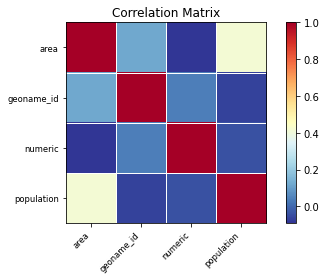

In [12]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

En este caso vemos baja correlación entre las variables. Dependiendo del algoritmo que utilicemos
podría ser una buena decisión eliminar features que tuvieran alta correlación
Cargamos un segundo archivo csv para ahondar en el crecimiento de la población en los últimos
años, filtramos a España y visualizamos

## Cargar una segunda fuente de datos

In [13]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
df_pop = pd.read_csv(url)
print(df_pop.head(5))

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460


In [14]:
df_pop.sample(10)

,country,year,population
322,Comoros,2002,614382
1360,Singapore,1972,2152400
1012,Montenegro,1972,527678
1602,United Kingdom,1982,56339704
144,Bosnia and Herzegovina,1952,2791000
302,Colombia,1962,17009885
810,Jordan,1982,2347031
593,Greece,1977,9308479
255,Central African Republic,1967,1733638
917,Madagascar,1977,8007166


In [ ]:
# df_pop.to_csv("Poblacion_crecimiento.csv")

In [23]:
df_pop.country.unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Honduras',
 'Hong Kong, China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kenya',
 'Korea, Dem. Rep.',
 'Korea, Rep.',
 'Kuwait',
 'Lebanon',
 'Lesotho',
 'Liberia',
 '

### Aqui vemos la población año tras año de España

In [24]:
df_pop_es = df_pop[df_pop["country"] == 'Spain' ]
df_pop_es.head()

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161


In [26]:
df_pop_es.drop( [1416], axis = 0).head()

,country,year,population
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161
1421,Spain,1977,36439000


In [27]:
df_pop_es.drop( ["country"], axis = 1).head()

,year,population
1416,1952,28549870
1417,1957,29841614
1418,1962,31158061
1419,1967,32850275
1420,1972,34513161


In [28]:
df_pop_es.shape

(12, 3)

## Visualicemos datos

<AxesSubplot:>

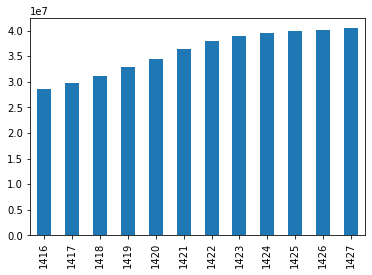

In [29]:
df_pop_es.drop( ['country'], axis = 1)['population'].plot(kind='bar')

<AxesSubplot:xlabel='year'>

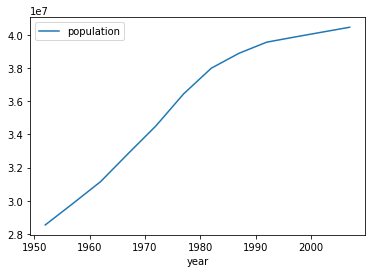

In [32]:
df_pop_es.drop(['country'],axis=1).set_index("year").plot()

In [33]:
df_pop_ar = df_pop[(df_pop["country"] == 'Argentina')]
df_pop_ar.head()

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799


In [34]:
df_pop_ar.shape

(12, 3)

<AxesSubplot:xlabel='year'>

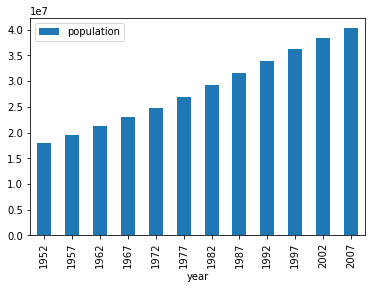

In [35]:
df_pop_ar.set_index('year').plot(kind='bar')

## Comparativa entre 2 países

<AxesSubplot:>

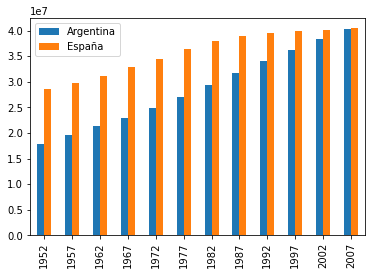

In [36]:
anios  = df_pop_es['year'].unique()
pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values

df_plot = pd.DataFrame({'Argentina': pop_ar,
                        'España'   : pop_es}, 
                       index = anios)
df_plot.plot(kind='bar')

<AxesSubplot:>

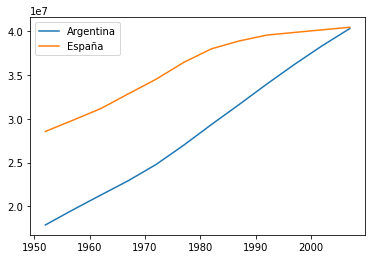

In [37]:
df_plot.plot()

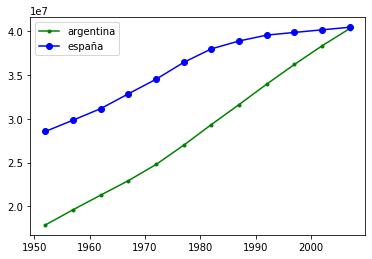

In [46]:
plt.plot(anios, pop_ar  ,'g.-', label = "argentina")
plt.plot(anios, pop_es  ,'bo-', label = "españa")
plt.legend()
plt.show()

# Filtremos paises hispano-hablantes

In [58]:
df

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,NaN,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,NaN,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,NaN,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,NaN,NaN,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,NaN,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


In [59]:
df_espanol = df.replace(np.nan, '', regex=True)
df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,,,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,,,.af
3,AG,ATG,443.0,St. John's,,XCD,Dollar,,AC,3576396,en-AG,Antigua and Barbuda,,28,+1-268,86754,,,.ag
4,AI,AIA,102.0,The Valley,,XCD,Dollar,,AV,3573511,en-AI,Anguilla,,660,+1-264,13254,,,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,,,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


In [60]:
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es')]
df_espanol.shape

(29, 19)

In [54]:
df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
49,CR,CRI,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
82,GI,GIB,6.5,Gibraltar,EU,GIP,Pound,,GI,2411586,"en-GI,es,it,pt",Gibraltar,ES,292,350,27884,,,.gi
165,NI,NIC,129494.0,Managua,,NIO,Cordoba,,NU,3617476,"es-NI,en",Nicaragua,"CR,HN",558,505,5995928,###-###-#,^(\d{7})$,.ni
173,PA,PAN,78200.0,Panama City,,PAB,Balboa,,PM,3703430,"es-PA,en",Panama,"CR,CO",591,507,3410676,,,.pa
182,PR,PRI,9104.0,San Juan,,USD,Dollar,,RQ,4566966,"en-PR,es-PR",Puerto Rico,,630,+1-787 and 1-939,3916632,#####-####,^00[679]\d{2}(?:-\d{4})?$,.pr
226,TT,TTO,5128.0,Port of Spain,,TTD,Dollar,,TD,3573591,"en-TT,hns,fr,es,zh",Trinidad and Tobago,,780,+1-868,1228691,,,.tt


## Visualicemos por población

<AxesSubplot:xlabel='alpha_3'>

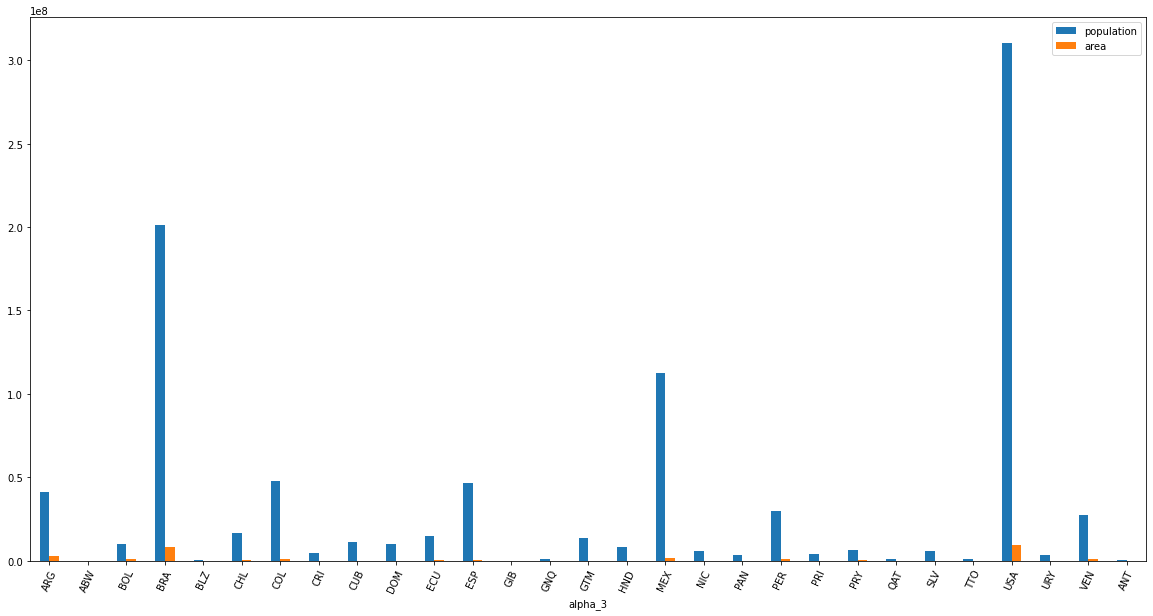

In [61]:
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

## Detección de Outliers

In [62]:
anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Establecer límite superior e inferior a 2 desviación estándar
    data_std  = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit     = data_mean - anomaly_cut_off 
    upper_limit     = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(row)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or \
           (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

anomalies = find_anomalies(df_espanol[['population']])

-102872707.87855022
167589161.25786057


In [63]:
anomalies

[30, 233]

In [67]:
for an in anomalies:
    print(df_espanol.loc[an].alpha_3)

BRA
USA


In [68]:
# Quitemos BRA y USA por ser outlies y volvamos a graficar:
df_espanol.drop(anomalies, inplace = True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3872\435835988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espanol.drop(anomalies, inplace = True)


<AxesSubplot:xlabel='alpha_3'>

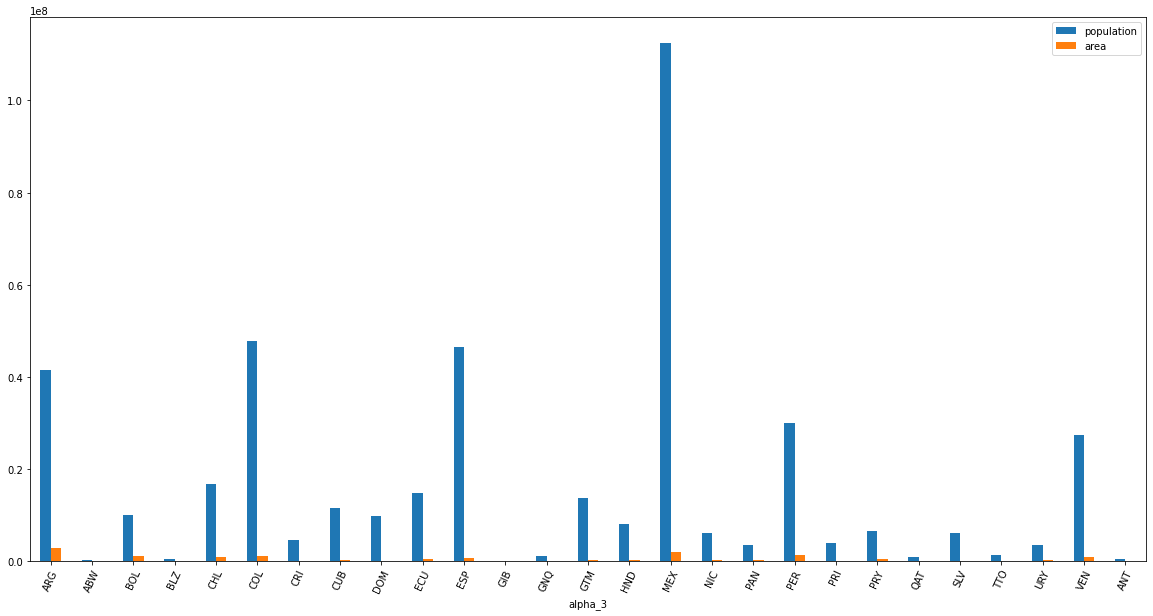

In [69]:
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

## Graficamos ordenando por tamaño Población

<AxesSubplot:xlabel='alpha_3'>

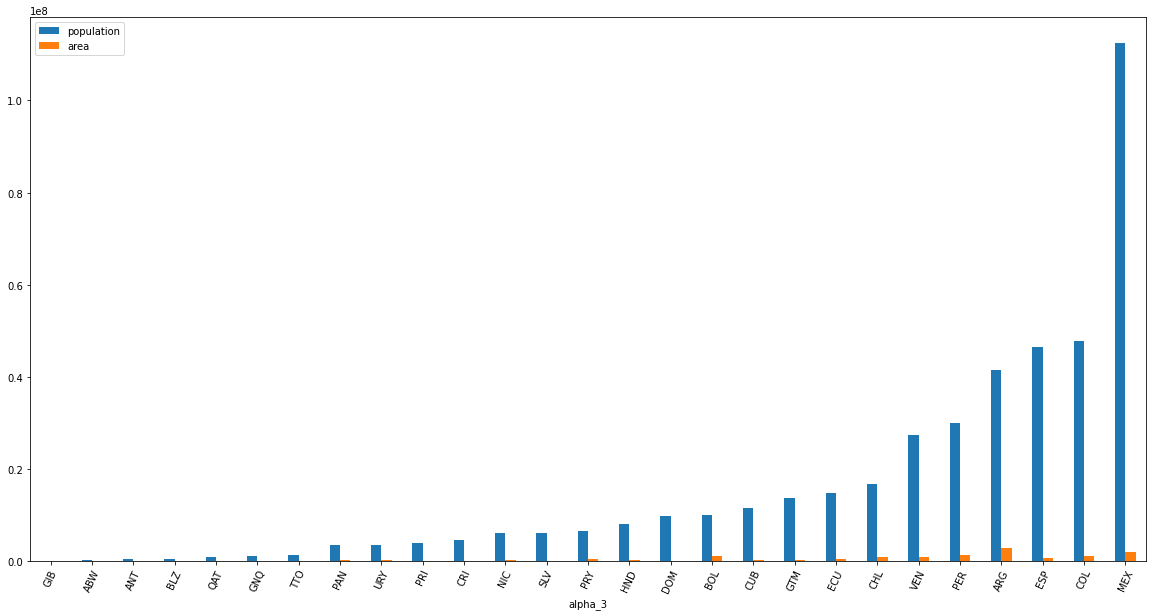

In [70]:
df_espanol.set_index('alpha_3')[['population','area']].sort_values(["population"]).plot(kind='bar',rot=65,figsize=(20,10))

## Visualización por Área

<AxesSubplot:xlabel='alpha_3'>

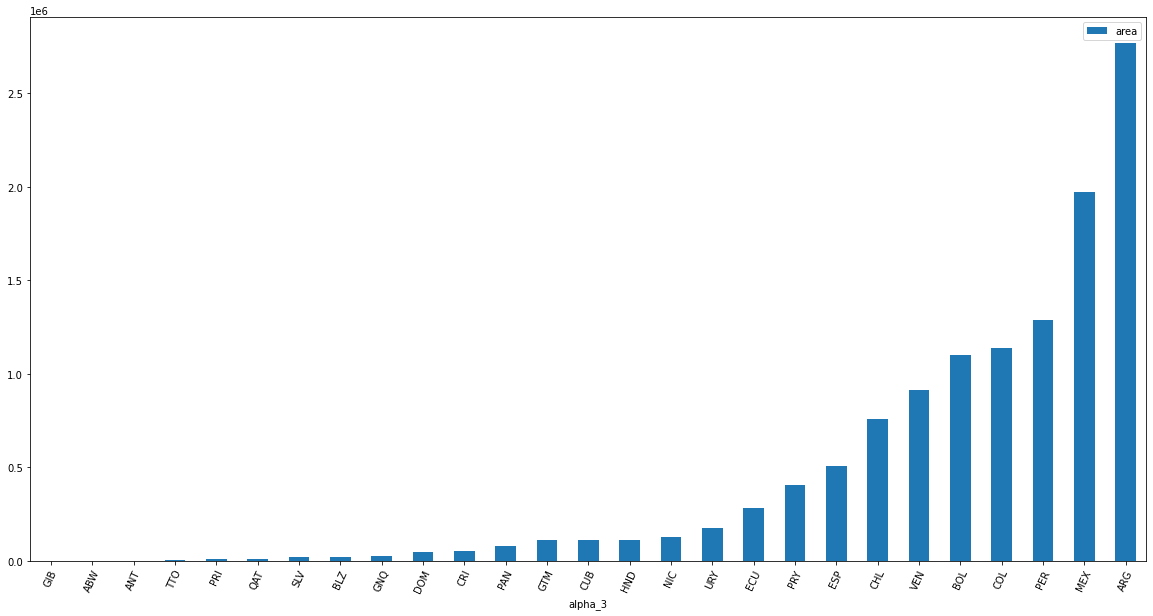

In [71]:
df_espanol.set_index('alpha_3')[['area']].sort_values(["area"]).plot(kind='bar',rot=65,figsize=(20,10))

In [72]:
# En este caso, podriamos quitar por "lo bajo", area menor a 110.000 km2:
df_2 = df_espanol.set_index('alpha_3')
df_2 = df_2[df_2['area'] > 110000]
df_2

,alpha_2,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
alpha_3,,,,,,,,,,,,,,,,,,
ARG,AR,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
BOL,BO,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
CHL,CL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
COL,CO,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
CUB,CU,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
ECU,EC,283560.0,Quito,SA,USD,Dollar,,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,@####@,^([a-zA-Z]\d{4}[a-zA-Z])$,.ec
ESP,ES,504782.0,Madrid,EU,EUR,Euro,,SP,2510769,"es-ES,ca,gl,eu,oc",Spain,"AD,PT,GI,FR,MA",724,34,46505963,#####,^(\d{5})$,.es
HND,HN,112090.0,Tegucigalpa,,HNL,Lempira,,HO,3608932,es-HN,Honduras,"GT,NI,SV",340,504,7989415,@@####,^([A-Z]{2}\d{4})$,.hn
MEX,MX,1972550.0,Mexico City,,MXN,Peso,,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,#####,^(\d{5})$,.mx


<AxesSubplot:xlabel='alpha_3'>

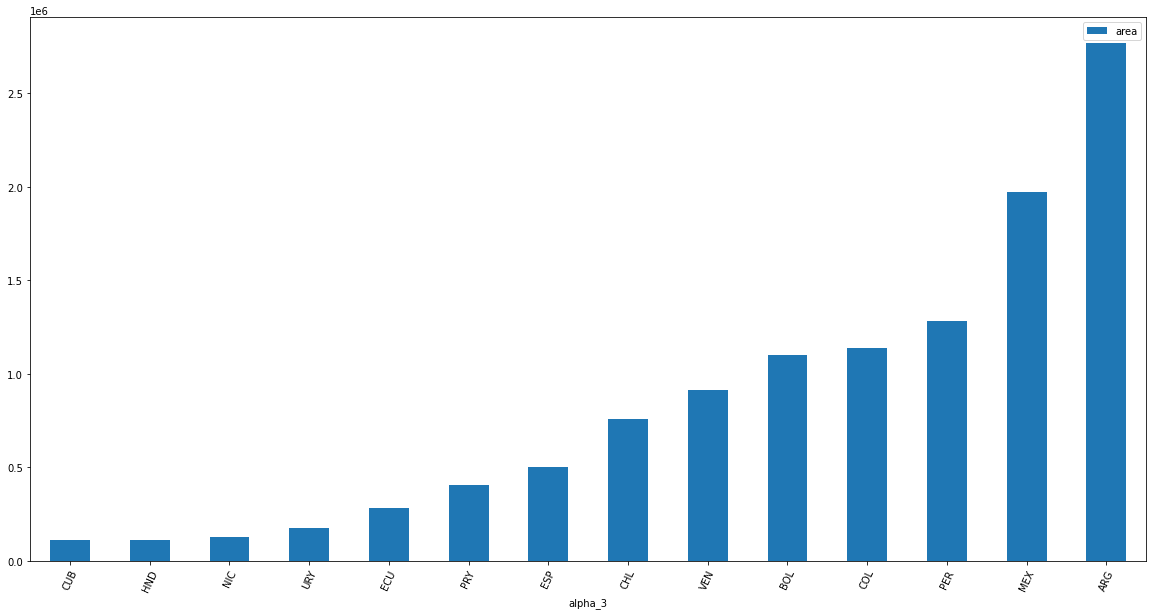

In [73]:
df_2[['area']].sort_values(["area"]).plot(kind='bar',rot=65,figsize=(20,10))

<AxesSubplot:xlabel='alpha_3'>

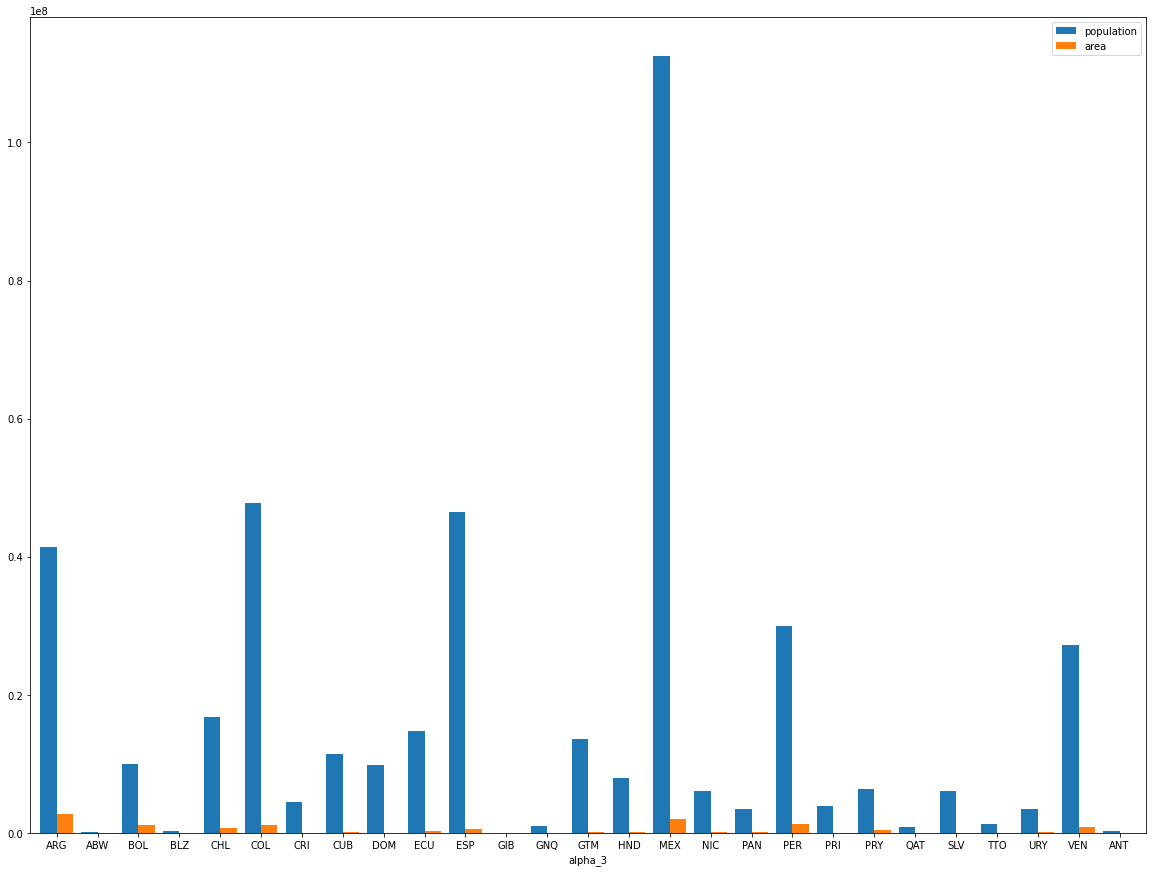

In [74]:
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=0,figsize=(20,15),width=0.8)

<AxesSubplot:xlabel='alpha_3'>

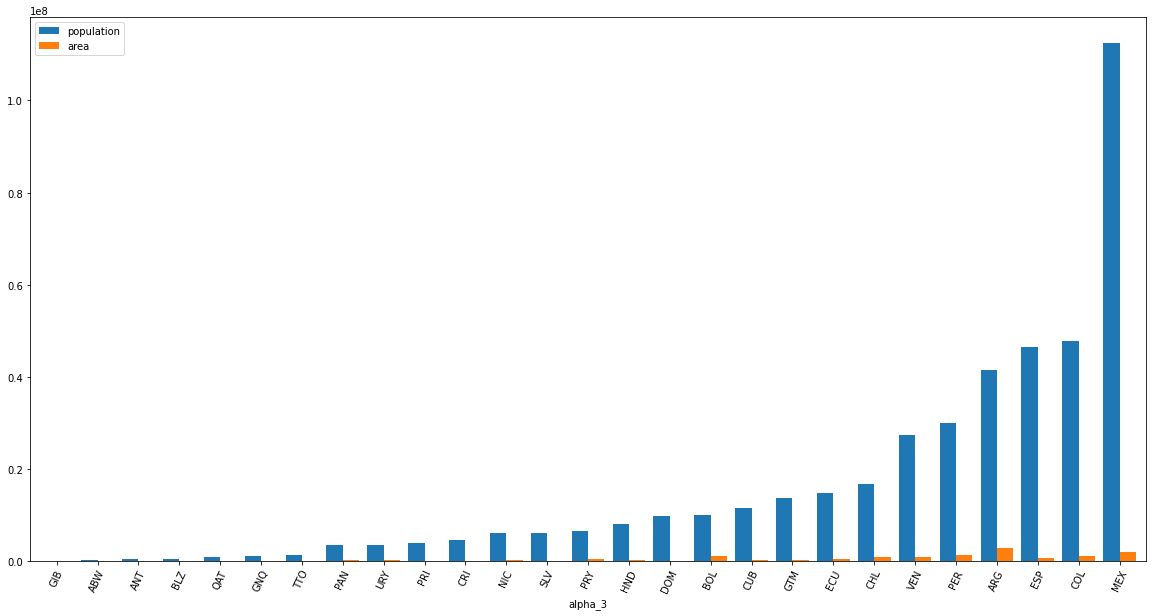

In [75]:
df_espanol.set_index('alpha_3')[
    ['population','area']].sort_values(
    ["population"]).plot(kind='bar',rot=65,figsize=(20,10),width=0.8)

array([<AxesSubplot:ylabel='area'>], dtype=object)

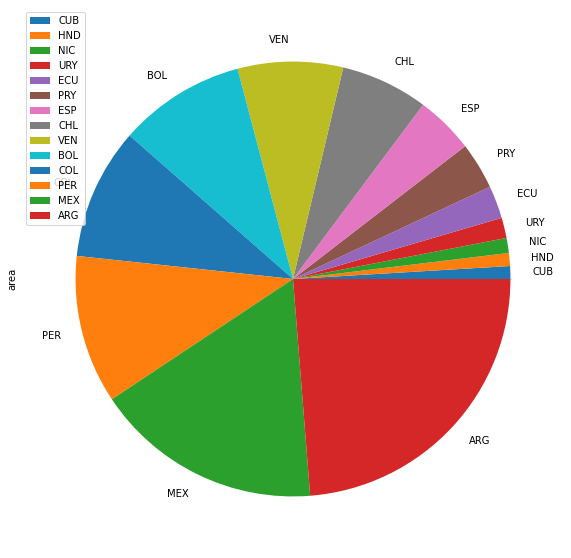

In [76]:

df_2[['area']].sort_values(["area"]).plot(kind='pie',subplots=True,rot=65,figsize=(20,10))

<AxesSubplot:ylabel='area'>

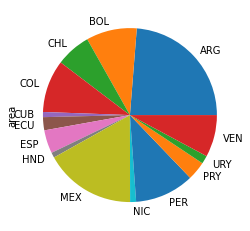

In [77]:
df_2.area.plot(kind = "pie",)